# Traditional Approaches
* Simple moving average and smoothing based forecasting
* Holt's, Holt-Winter's Exponential Smoothing based forecasting
* Box-Jenkins methodology(AR, MA, ARIMA, S-ARIMA, etc.)

# Key Concepts
* Stationarity: One the key assumptions behind the ARIMA models we will be
discussing next. Stationarity refers to the property where for a time series its mean, variance, and autocorrelation are time invariant. In other words, mean, variance,
and autocorrelation do not change with time. For instance, a time series having
an upward (or downward) trend is a clear indicator of a non-stationarity because
its mean would change with time (see web site visit data example in the previous
section).
* Differencing: One of the methods of stationarizing series. Though there can be other
transformations, differencing is widely used to stabilize the mean of a time series. We
simply compute difference between consecutive observations to obtain a differenced
series. We can then apply different tests to confirm if the resulting series is stationary
or not. We can also perform second order differencing, seasonal differencing, and so
on, depending on the time series at hand.
* Unit Root Tests: Statistical tests that help us understand if a given series is stationary
or not. The Augmented Dickey Fuller test begins with a null hypothesis of series being
non-stationary, while Kwiatkowski-Phillips-Schmidt-Shin test or KPSS has a null
hypothesis that the series is stationary. We then perform a regression fit to reject or
fail to reject the null hypothesis.

# ARIMA (Auto Regressive Integrated Moving Average)
* **Auto Regressive or AR Modeling**
* **Moving Average or MA Modeling**

In [2]:
import quandl
import warnings
import itertools
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')


from statsmodels.tsa.seasonal import seasonal_decompose


from arima_utils import ad_fuller_test, plot_rolling_stats
from arima_utils import plot_acf_pacf, arima_gridsearch_cv

In [3]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

# specify to ignore warning messages
warnings.filterwarnings("ignore") 

## Getting the Data

In [4]:
df = quandl.get("BUNDESBANK/BBK01_WT5511", end_date="2017-07-31")
print(df.shape)

new_df = df.reindex(pd.date_range(df.index.min(), 
                                  df.index.max(), 
                                  freq='D')).fillna(method='ffill')
print(new_df.shape)
#close_series = new_df.Close

(12152, 1)
(17550, 1)


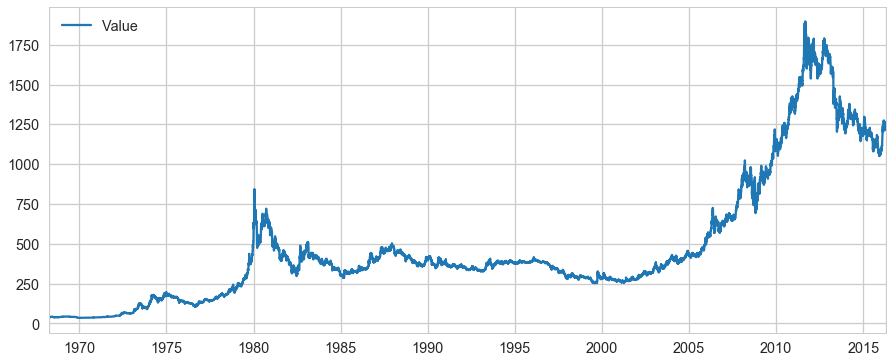

In [5]:
new_df.plot(figsize=(15, 6))
plt.show()

## Decompose

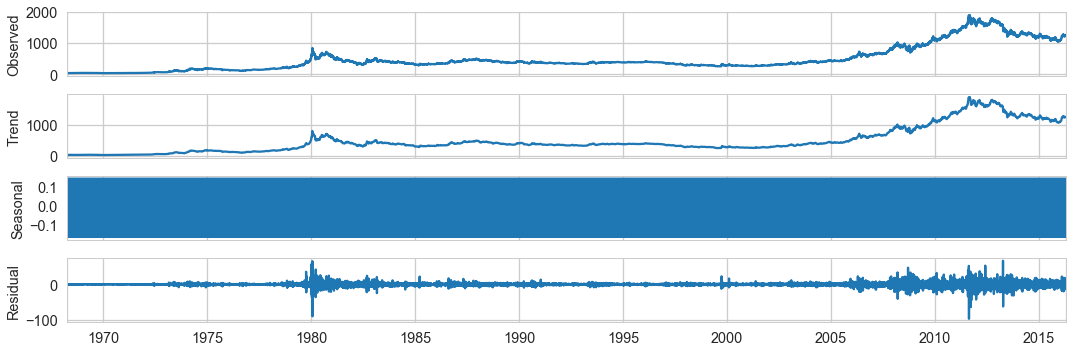

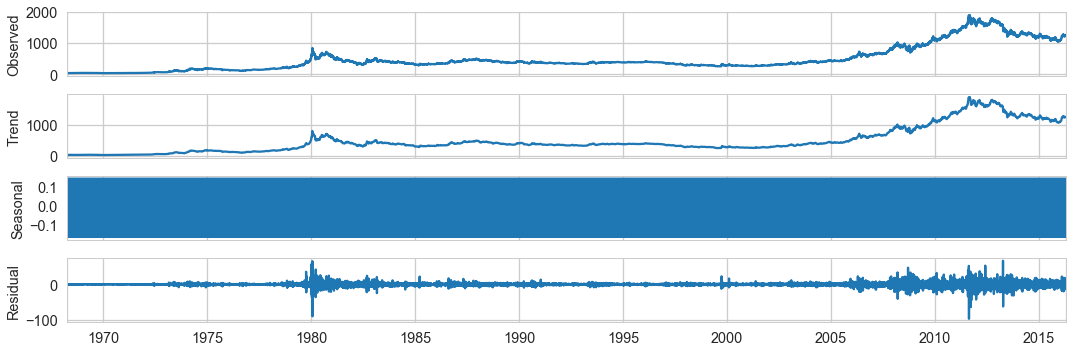

In [6]:
decompose = seasonal_decompose(new_df.Value.interpolate())
decompose.plot()

## Dickey Fuller Test

### Original Series

Test Statistic                    -0.364334
p-value                            0.915886
#Lags Used                        43.000000
Number of Observations Used    17506.000000
Critical Value (1%)               -3.430724
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
dtype: float64


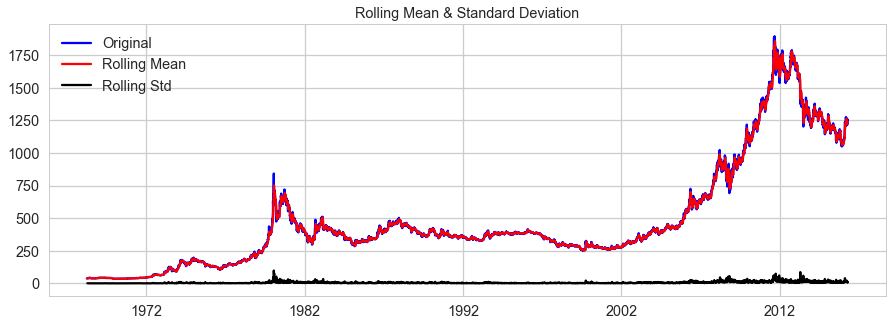

In [7]:
# Original Series
ad_fuller_test(new_df.Value)
plot_rolling_stats(new_df.Value)

### Log Series

Test Statistic                    -1.849748
p-value                            0.356057
#Lags Used                        29.000000
Number of Observations Used    17520.000000
Critical Value (1%)               -3.430723
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
dtype: float64


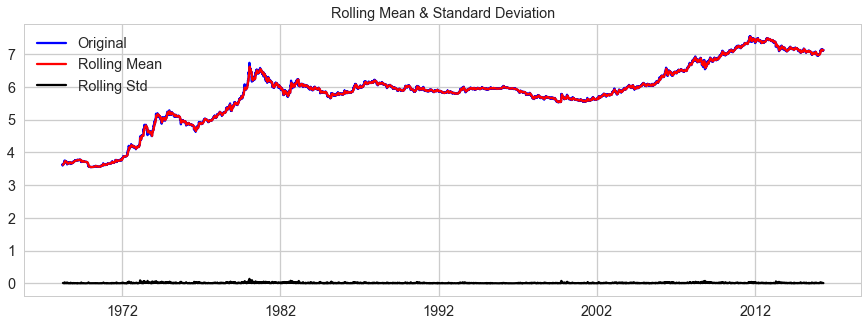

In [8]:
log_series = np.log(new_df.Value)

ad_fuller_test(log_series)
plot_rolling_stats(log_series)

### Log Difference

In [9]:
# Using log series with a shift to make it stationary
log_series_shift = log_series - log_series.shift()
log_series_shift = log_series_shift[~np.isnan(log_series_shift)]

Test Statistic                   -23.917175
p-value                            0.000000
#Lags Used                        28.000000
Number of Observations Used    17520.000000
Critical Value (1%)               -3.430723
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
dtype: float64


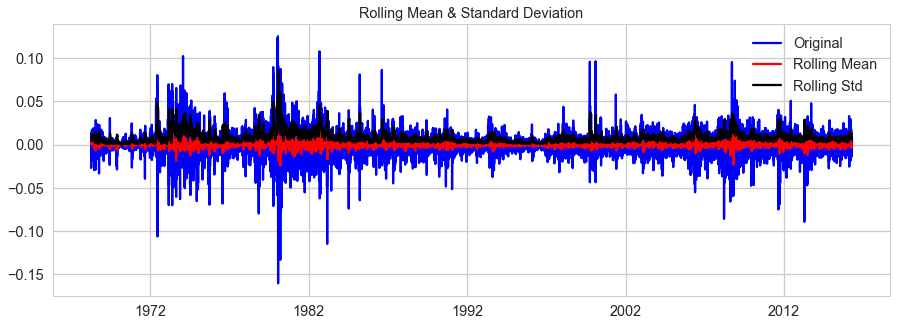

In [10]:
ad_fuller_test(log_series_shift)
plot_rolling_stats(log_series_shift)

## ACF/ PACF

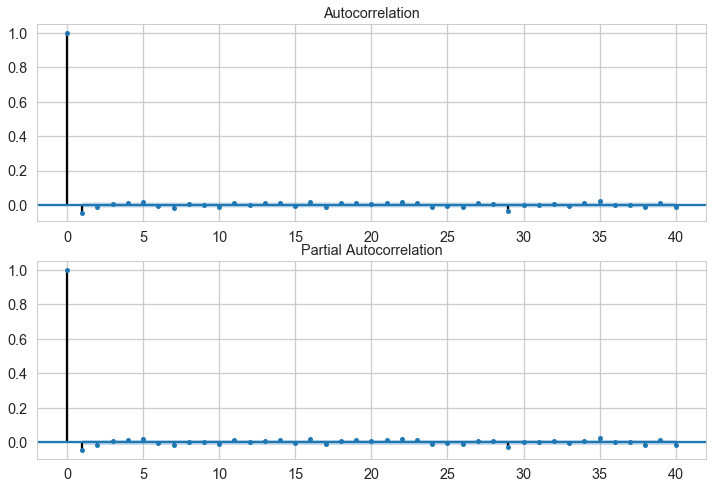

In [11]:
plot_acf_pacf(log_series_shift)

Log Differenced series seems stationary, same is visible through ACF and PACF plots

## ARIMA

In [12]:
new_df['log_series'] = log_series
new_df['log_series_shift'] = log_series_shift

### Training-Testing Split

********************
Iteration 1 of 5
TRAIN: [   0    1    2 ..., 2922 2923 2924] TEST: [2925 2926 2927 ..., 5847 5848 5849]
Train shape:(2925,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:5358.675881541096
ARIMA(0, 0, 1)- AIC:1370.644173716004
ARIMA(0, 1, 0)- AIC:-17795.53995335306
ARIMA(0, 1, 1)- AIC:-17793.56497363464
ARIMA(1, 0, 0)- AIC:-17788.098388741855
ARIMA(1, 0, 1)- AIC:-17786.104195008185
ARIMA(1, 1, 0)- AIC:-17793.562143972755
ARIMA(1, 1, 1)- AIC:-17796.006063250767
Best Model params:(1, 1, 1) AIC:-17796.006063250767
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 2924
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8902.003
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 02 Apr 2018   AIC                         -17796.006
Time:                        11:34:45   BIC                         -17772

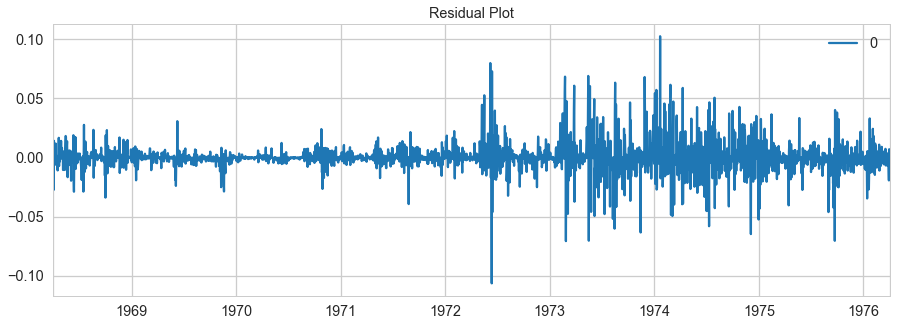

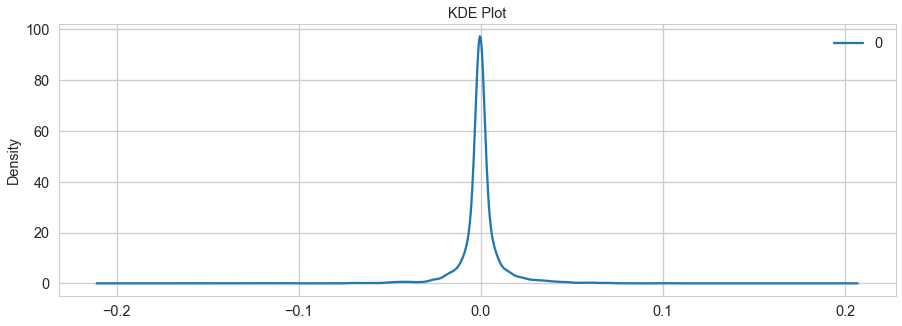

                  0
count  2.924000e+03
mean   2.148560e-07
std    1.152510e-02
min   -1.065015e-01
25%   -1.970483e-03
50%   -4.105039e-04
75%    1.345781e-03
max    1.024453e-01


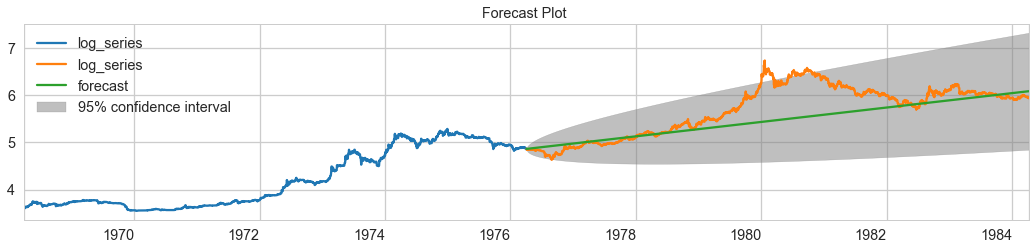

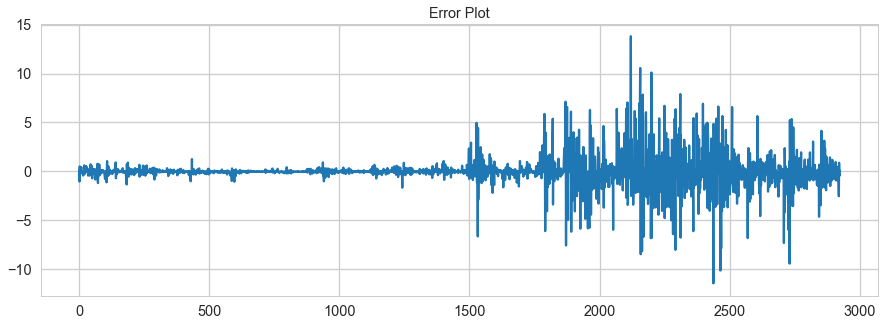

********************
Iteration 2 of 5
TRAIN: [   0    1    2 ..., 5847 5848 5849] TEST: [5850 5851 5852 ..., 8772 8773 8774]
Train shape:(5850,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:15792.660349788819
ARIMA(0, 0, 1)- AIC:7814.0970964599055
ARIMA(0, 1, 0)- AIC:-33512.28307448926
ARIMA(0, 1, 1)- AIC:-33516.96483489989
ARIMA(1, 0, 0)- AIC:-33502.69897986947
ARIMA(1, 0, 1)- AIC:-33507.00768423114
ARIMA(1, 1, 0)- AIC:-33516.56690977644
ARIMA(1, 1, 1)- AIC:-33517.28713826041
Best Model params:(1, 1, 1) AIC:-33517.28713826041
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 5849
Model:                 ARIMA(1, 1, 1)   Log Likelihood               16762.644
Method:                       css-mle   S.D. of innovations              0.014
Date:                Mon, 02 Apr 2018   AIC                         -33517.287
Time:                        11:34:48   BIC                         -33490.59

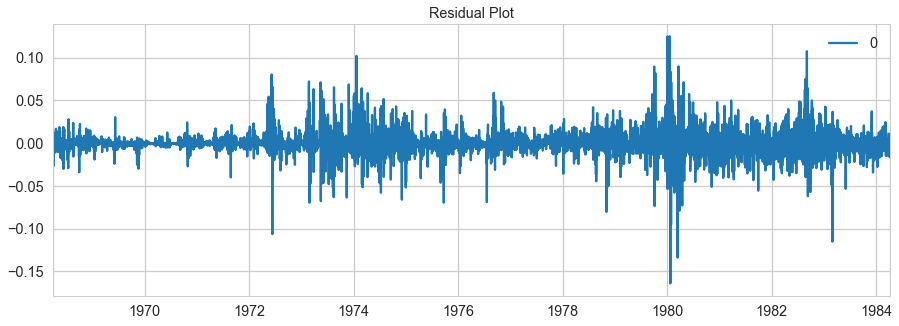

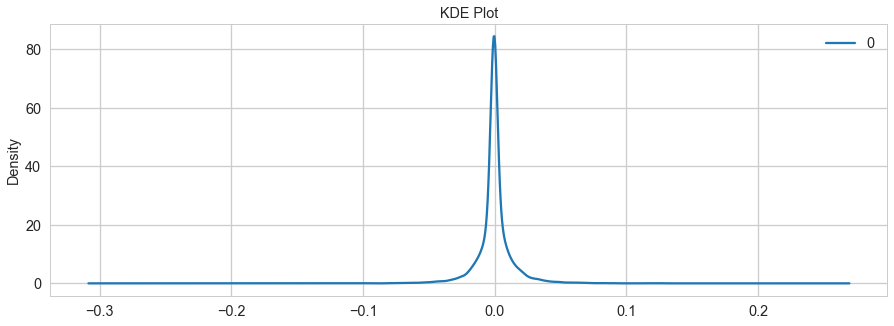

                  0
count  5.849000e+03
mean  -1.228781e-07
std    1.377704e-02
min   -1.640483e-01
25%   -2.716840e-03
50%   -4.121946e-04
75%    2.374836e-03
max    1.249848e-01


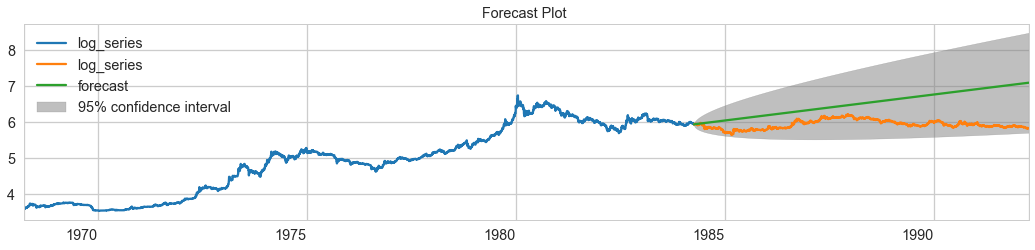

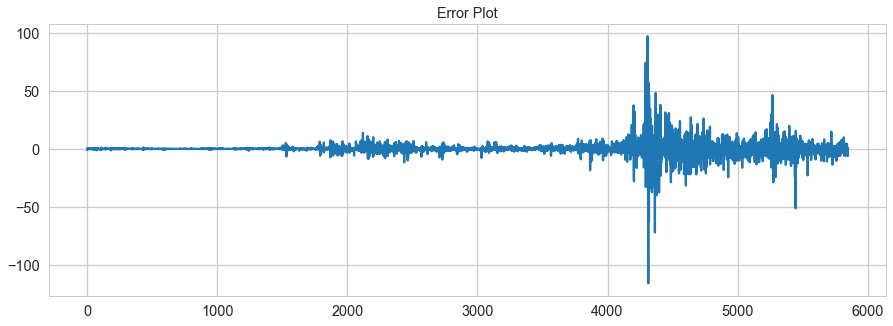

********************
Iteration 3 of 5
TRAIN: [   0    1    2 ..., 8772 8773 8774] TEST: [ 8775  8776  8777 ..., 11697 11698 11699]
Train shape:(8775,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:22924.700928334434
ARIMA(0, 0, 1)- AIC:10939.921256251644
ARIMA(0, 1, 0)- AIC:-52348.468958811376
ARIMA(0, 1, 1)- AIC:-52365.88642216599
ARIMA(1, 0, 0)- AIC:-52340.1357073986
ARIMA(1, 0, 1)- AIC:-52357.1369426695
ARIMA(1, 1, 0)- AIC:-52364.9954035126
ARIMA(1, 1, 1)- AIC:-52366.212486534525
Best Model params:(1, 1, 1) AIC:-52366.212486534525
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 8774
Model:                 ARIMA(1, 1, 1)   Log Likelihood               26187.106
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 02 Apr 2018   AIC                         -52366.212
Time:                        11:34:51   BIC                         -52

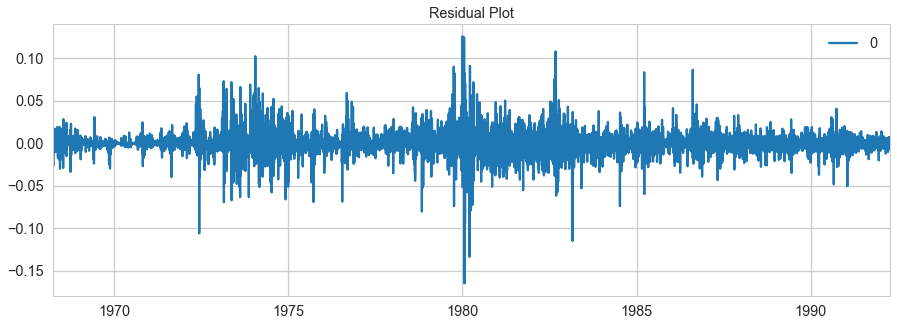

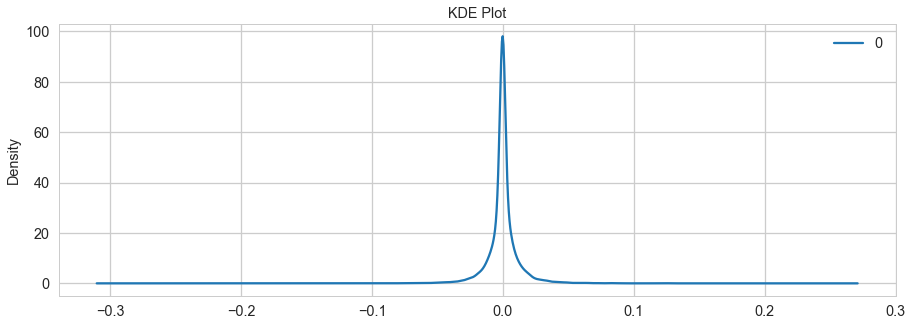

                  0
count  8.774000e+03
mean  -8.998159e-08
std    1.223435e-02
min   -1.650598e-01
25%   -2.567140e-03
50%   -2.630402e-04
75%    2.402574e-03
max    1.256747e-01


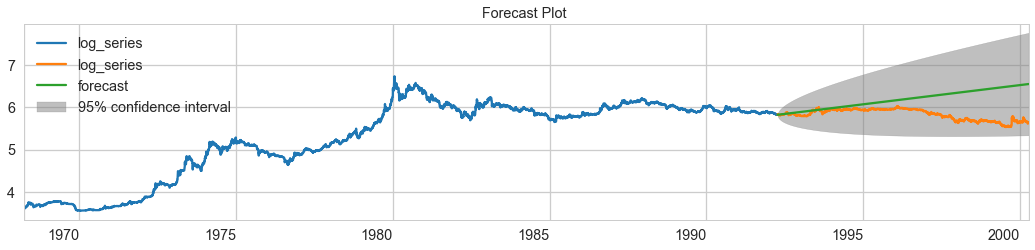

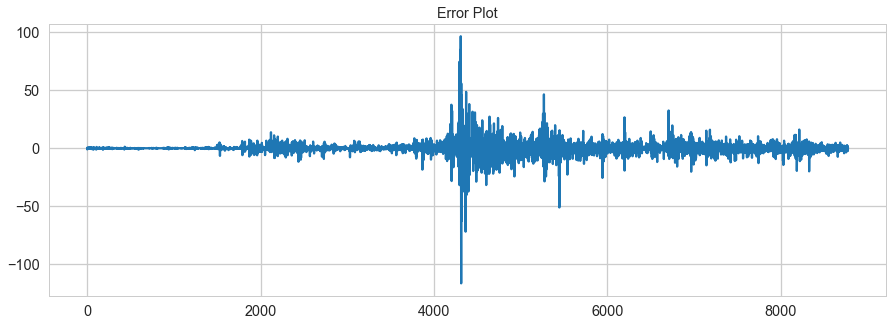

********************
Iteration 4 of 5
TRAIN: [    0     1     2 ..., 11697 11698 11699] TEST: [11700 11701 11702 ..., 14622 14623 14624]
Train shape:(11700,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:28323.59324349887
ARIMA(0, 0, 1)- AIC:12343.352798126198
ARIMA(0, 1, 0)- AIC:-72092.36827299207
ARIMA(0, 1, 1)- AIC:-72119.82137921089
ARIMA(1, 0, 0)- AIC:-72085.08760830219
ARIMA(1, 0, 1)- AIC:-72112.18893189615
ARIMA(1, 1, 0)- AIC:-72118.75588542139
ARIMA(1, 1, 1)- AIC:-72119.86496021594
Best Model params:(1, 1, 1) AIC:-72119.86496021594
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                11699
Model:                 ARIMA(1, 1, 1)   Log Likelihood               36063.932
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 02 Apr 2018   AIC                         -72119.865
Time:                        11:34:55   BIC                      

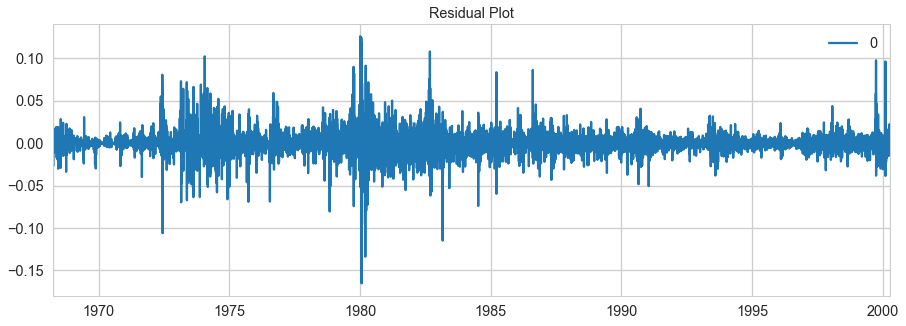

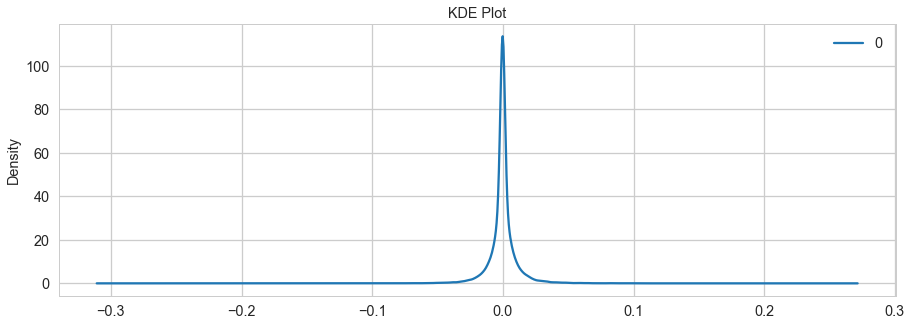

                  0
count  1.169900e+04
mean  -6.253972e-08
std    1.109183e-02
min   -1.652707e-01
25%   -2.322445e-03
50%   -1.811519e-04
75%    2.032712e-03
max    1.259057e-01


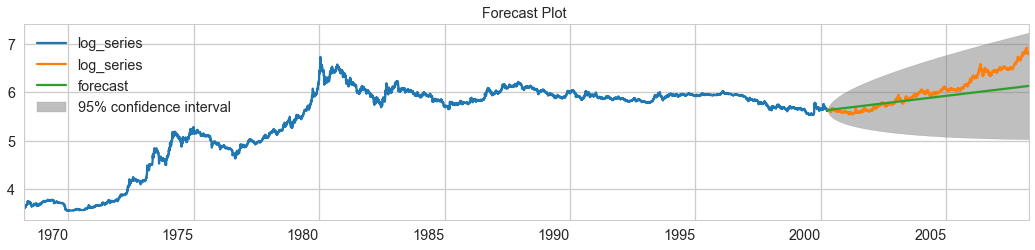

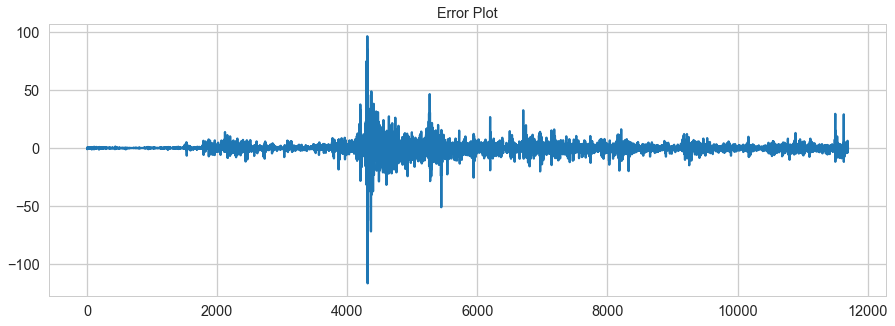

********************
Iteration 5 of 5
TRAIN: [    0     1     2 ..., 14622 14623 14624] TEST: [14625 14626 14627 ..., 17547 17548 17549]
Train shape:(14625,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:34336.88986620506
ARIMA(0, 0, 1)- AIC:14355.65240037597
ARIMA(0, 1, 0)- AIC:-91312.75496091215
ARIMA(0, 1, 1)- AIC:-91348.77150649176
ARIMA(1, 0, 0)- AIC:-91301.13184772382
ARIMA(1, 0, 1)- AIC:-91336.4111856907
ARIMA(1, 1, 0)- AIC:-91347.65810577202
ARIMA(1, 1, 1)- AIC:-91348.29945380604
Best Model params:(0, 1, 1) AIC:-91348.77150649176
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                14624
Model:                 ARIMA(0, 1, 1)   Log Likelihood               45677.386
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 02 Apr 2018   AIC                         -91348.772
Time:                        11:35:01   BIC                        

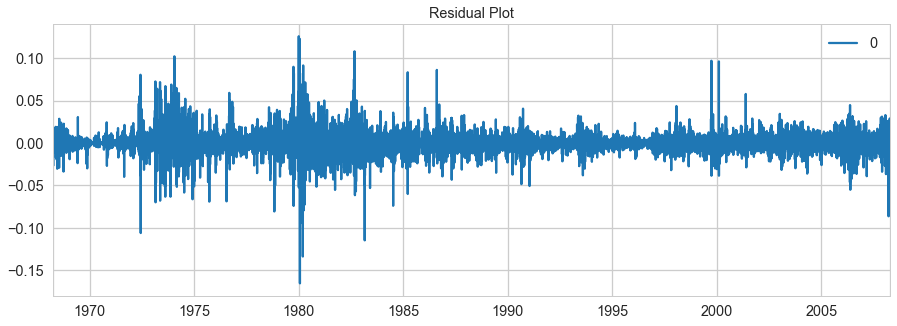

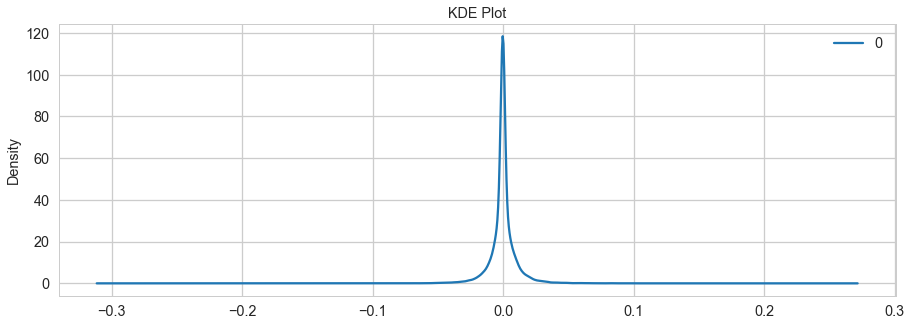

                  0
count  1.462400e+04
mean  -3.470380e-08
std    1.064827e-02
min   -1.656143e-01
25%   -2.387169e-03
50%   -2.301705e-04
75%    2.207817e-03
max    1.258538e-01


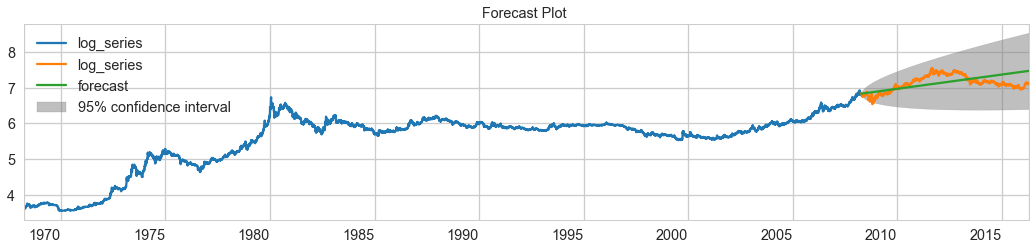

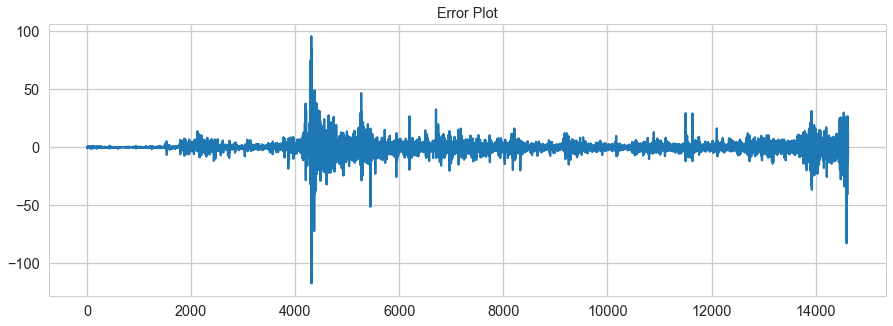

In [13]:
results_dict = arima_gridsearch_cv(new_df.log_series,cv_splits=5)